In [1]:
# Import all library.

import ROOT
import numpy as np
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

In [ ]:
#Use ROOT in order to make txt file with selected variables
processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
#processes = "ZZ"
output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/TxtFiles"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"

#nrEvents = 10

#ylabel = "Occurrences"


for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()

    text_file = open(output+"/"+"TxtFile_"+process+".txt", "w")

    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
    
        #=============================================================================
        #=======================EMJESGSCMu========================================
        # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
        # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
        # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)
    
        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
        # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        #==========================
        #========Target===========
    
        #j1
        Pt1_GENWZ = tree.j1_GENWZ_Pt
        #j2
        Pt2_GENWZ = tree.j2_GENWZ_Pt
    
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
        # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
    
    #Loop em python
        #PT,ETA,PHI,E      1     2     3     4     5     6     7      8    9    10     11    12    13
        text_file.write("%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f\n"%(j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk, j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu, Pt1_GENWZ))
        text_file.write("%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f\n"%(j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk, j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu, E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu, Pt2_GENWZ))
        
        
    text_file.close()
    print "Good! Txt done! "+process+"!"

In [2]:
# Using Txt file in order to make a correlative.

data = '/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/TxtFiles/TxtFile_lvbb125.txt'

In [3]:
# Import a Matrix with variables from txt file using numpy

f = open(data,'r')

M = np.loadtxt(data)

#AutCor = np.corrcoef(M,rowvar=0)

#plt.acorr(M)
M


array([[  1.00000000e-02,   0.00000000e+00,   1.70000000e-02, ...,
          9.21870000e+01,   5.98100000e+01,   6.10200000e+01],
       [  1.70000000e-02,   1.13000000e-01,   9.50000000e-02, ...,
          1.07602000e+02,   5.98100000e+01,   6.44650000e+01],
       [  9.00000000e-03,   0.00000000e+00,   9.00000000e-03, ...,
          3.70011000e+02,   4.97770000e+01,   1.06725000e+02],
       ..., 
       [  1.60000000e-02,   5.00000000e-03,   2.30000000e-02, ...,
          3.86260000e+01,   3.57540000e+01,   3.39020000e+01],
       [  1.40000000e-02,   1.22000000e-01,   4.60000000e-02, ...,
          1.07293000e+02,   5.50990000e+01,   9.68780000e+01],
       [  1.60000000e-02,   4.80000000e-02,   1.20000000e-01, ...,
          6.82100000e+01,   5.50990000e+01,   5.35120000e+01]])

In [9]:
M.shape

(191100, 13)

In [28]:
AutCor = np.corrcoef(M)
AutCor

MemoryError: 

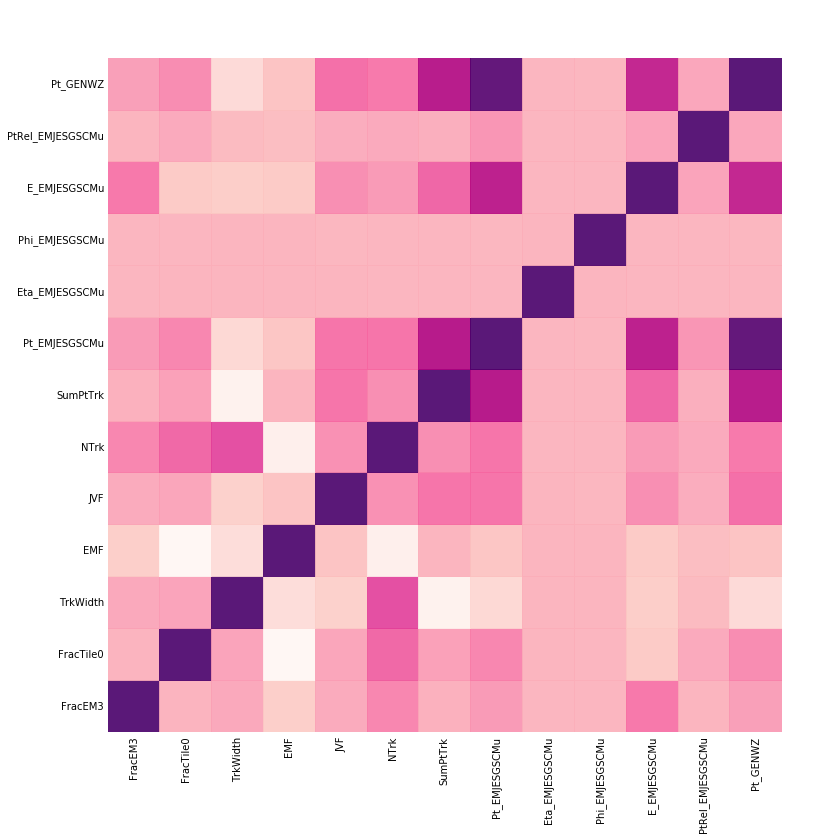

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()
heatmap = ax.pcolor(AutCor,cmap=plt.cm.RdPu,alpha=0.9)

# Format
fig = plt.gcf()
fig.set_size_inches(13, 13)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(AutCor.shape[1])+0.5, minor=False)
ax.set_xticks(np.arange(AutCor.shape[0])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

labels = ['FracEM3', 'FracTile0', 'TrkWidth', 'EMF', 'JVF', 'NTrk', 'SumPtTrk', 'Pt_EMJESGSCMu', 'Eta_EMJESGSCMu', 'Phi_EMJESGSCMu', 'E_EMJESGSCMu', 'PtRel_EMJESGSCMu', 'Pt_GENWZ']


#
#plt.xticks(range(13))
#plt.yticks(range(13))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

In [29]:
Corr = np.correlate(M,M)

ValueError: object too deep for desired array